In [1]:
import numpy as np
import pandas as pd
from matplotlib import cm
import matplotlib.pyplot as plt
import copy

In [2]:
class KMeansClustering:

    colormap = {}
    centroids = {}
    df = pd.DataFrame() 
    labels = {}
    number_of_clusters = None
    lower_bound = None
    upper_bound = None
    
    # Constructor
    def __init__(self,K,dataframe,seed=None):
        if(seed!=None):
            np.random.seed(seed)

        self.number_of_clusters = K
        self.df = dataframe
        self.df['color'] = 'k'

        # Creating Color map using Set1 colormap format
        for i in range(self.number_of_clusters):
            color = cm.Set1(np.random.randint(0,10))
            self.colormap[i+1] = color
            self.labels[color] = 'Cluster ' + str(i+1)

        # offseting lower_bound and upper_bound by offset in order to increase range from finding random centroids
        offset = 20

        # finding lower_bound and upper_bound from database
        self.lower_bound = min(self.df.iloc[:,0].min(),self.df.iloc[:,1].min()) - offset
        self.upper_bound = max(self.df.iloc[:,0].max(),self.df.iloc[:,1].max()) + offset
        
        # Generating random centroids
        for i in range(self.number_of_clusters):
            x = np.random.randint(self.lower_bound, self.upper_bound)
            y = np.random.randint(self.lower_bound, self.upper_bound)
            self.centroids[i+1] = [x,y]


    def assigning_clusters(self):
        for i in self.centroids.keys():
            
            # Finding distance of points from ith centroid
            self.df[f'distance_from_{i}'] = (np.sqrt(
                                                ((self.df.iloc[:,0] - self.centroids[i][0]) ** 2) + 
                                                ((self.df.iloc[:,1] - self.centroids[i][1]) ** 2))
                                                )
        # Assigning Centroids to                                        
        centroid_distance_cols = [f'distance_from_{i}' for i in self.centroids.keys()]
        self.df['closest'] = self.df.loc[:, centroid_distance_cols].idxmin(axis=1).apply(lambda x: int(x[-1]))
        self.df['color'] = self.df['closest'].map(lambda x: self.colormap[x])
        return self.df

    # Function for updating centroids
    def updatingCentroids(self):
        old_centroids = copy.deepcopy(self.centroids)
        
        for i in self.centroids.keys():
            self.centroids[i][0] = np.mean(self.df[self.df['closest'] == i].iloc[:,0])
            self.centroids[i][1] = np.mean(self.df[self.df['closest'] == i].iloc[:,1])
        
        return old_centroids,self.centroids
    
    # function for visualizing cluster
    def visualize(self):
        plt.scatter(self.df.iloc[:,0], self.df.iloc[:,1], color=self.df['color'], alpha=0.8)
        for i in self.centroids.keys():
            plt.scatter(*self.centroids[i], color=self.colormap[i], label = self.labels[self.colormap[i]], marker='x')
        plt.xlim(self.lower_bound, self.upper_bound)
        plt.ylim(self.lower_bound, self.upper_bound)
        plt.legend()
        plt.title('Cluster Visualization')
        plt.show()


    # Plotting updated cluster
    def plot_updation(self,old_centroids,iteration):
        plt.figure(figsize=(5, 5))
        ax = plt.axes()
    
        # Plotting data points
        plt.scatter(self.df.iloc[:,0], self.df.iloc[:,1], color=self.df['color'], alpha=0.8)
        
        # Plotting centroids
        for i in self.centroids.keys():
            plt.scatter(*self.centroids[i], color=self.colormap[i],label=self.labels[self.colormap[i]], marker='x')
        
        plt.xlim(self.lower_bound, self.upper_bound)
        plt.ylim(self.lower_bound, self.upper_bound)
        
        # Plotting arrow in direction of centroid movement
        for i in old_centroids.keys():
            old_x = old_centroids[i][0]
            old_y = old_centroids[i][1]
            
            scaling_difference_between_distance_of_old_and_new_centroids = 0.75
            
            dx = (self.centroids[i][0] - old_centroids[i][0]) * scaling_difference_between_distance_of_old_and_new_centroids
            dy = (self.centroids[i][1] - old_centroids[i][1]) * scaling_difference_between_distance_of_old_and_new_centroids
            ax.arrow(old_x, old_y, dx, dy, head_width=2, head_length=3, fc=self.colormap[i], ec=self.colormap[i])
        plt.title(f'Iteration = {iteration}')
        plt.legend()
        plt.show()

    # Main Function For execution of Kmeans clustering
    def kmc_predict(self,plot=False):
        if(plot):
            self.visualize()
        self.df = self.assigning_clusters()
        iteration = 0
        while True:
            iteration += 1
            closest_centroids = self.df['closest'].copy(deep=True)
            self.df = self.assigning_clusters()

            

            old_centroids,self.centroids = self.updatingCentroids()
            
            if(plot):
                print(f'Iteration = {iteration}')
                self.plot_updation(old_centroids,iteration)

            if closest_centroids.equals(self.df['closest']):
                if plot:
                    self.visualize()
                return self.df['closest'].values

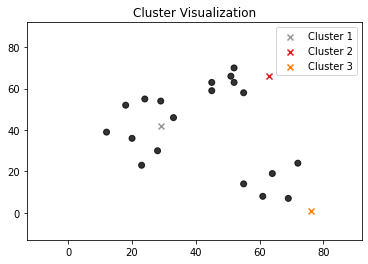

Iteration = 1


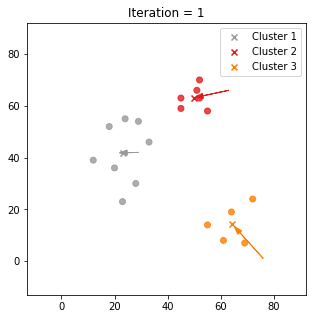

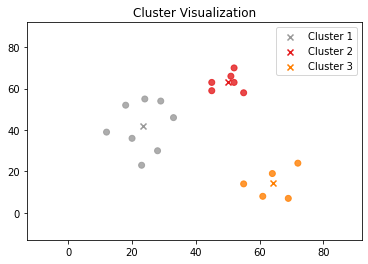

Clusters  [1 1 1 1 1 1 1 2 2 2 2 2 2 1 3 3 3 3 3]


In [3]:
# Input Section
df = pd.DataFrame({
    'x': [12, 20, 28, 18, 29, 33, 24, 45, 45, 52, 51, 52, 55, 23, 55, 61, 64, 69, 72],
    'y': [39, 36, 30, 52, 54, 46, 55, 59, 63, 70, 66, 63, 58, 23, 14, 8, 19, 7, 24]
})

seed = 200      # for generating random numbers
number_of_clusters = 3
show_graphs = True

knn = KMeansClustering(number_of_clusters,df,seed)
predicted_clusters = knn.kmc_predict(show_graphs)
print('Clusters ',predicted_clusters)